In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv")
data.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


## analisis korelasi

In [4]:
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


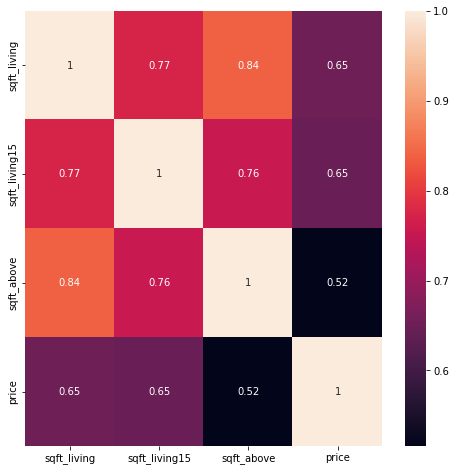

In [5]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Split dataset

In [6]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [7]:
print("Ukuran training dan testing data : ")
print("Training dataset : ", X_train.shape, y_train.shape)
print("Testing dataset : ", X_test.shape, y_test.shape)

Ukuran training dan testing data : 
Training dataset :  (80, 3) (80,)
Testing dataset :  (20, 3) (20,)


## Modeling

In [8]:
LinearReg = LinearRegression().fit(X_train, y_train)
LassoReg = Lasso(alpha=0.1).fit(X_train, y_train)
RidgeReg = Ridge(alpha=0.1).fit(X_train, y_train)
SVReg = SVR().fit(X_train, y_train)
DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, y_train)

## Evaluasi Model Menggunakan Metric MSE dan R2

In [9]:
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)

In [ ]:
print("Nilai MSE data training Regresi Linier = ", mean_squared_error(y_train, ypredtrain_reglin))
print("Nilai MSE data testing Regresi Linier = ", mean_squared_error(y_test, ypredtest_reglin), '\n')

print("Nilai MSE data training Regresi Lasso = ", mean_squared_error(y_train, ypredtrain_lasso))
print("Nilai MSE data testing Regresi Lasso = ", mean_squared_error(y_test, ypredtest_lasso), '\n')

print("Nilai MSE data training Regresi Ridge = ", mean_squared_error(y_train, ypredtrain_ridge))
print("Nilai MSE data testing Regresi Ridge = ", mean_squared_error(y_test, ypredtest_ridge), '\n')

print("Nilai MSE data training Regresi SVR = ", mean_squared_error(y_train, ypredtrain_svr))
print("Nilai MSE data testing Regresi SVR = ", mean_squared_error(y_test, ypredtest_svr), '\n')

print("Nilai MSE data training Regresi DTR = ", mean_squared_error(y_train, ypredtrain_dtr))
print("Nilai MSE data testing Regresi DTR = ", mean_squared_error(y_test, ypredtest_dtr))

In [11]:
print(f"R^2 score Regresi Linear : {LinearReg.score(X,Y)}")
print(f"R^2 score Regresi Lasso : {LinearReg.score(X,Y)}")
print(f"R^2 score Regresi Ridge : {LinearReg.score(X,Y)}")
print(f"R^2 score SVR : {LinearReg.score(X,Y)}")
print(f"R^2 score DT : {LinearReg.score(X,Y)}")

R^2 score Regresi Linear : 0.48353037146199596
R^2 score Regresi Lasso : 0.48353037146199596
R^2 score Regresi Ridge : 0.48353037146199596
R^2 score SVR : 0.48353037146199596
R^2 score DT : 0.48353037146199596


## Visualisasi Hasil Prediksi dengan Data Sebenarnya

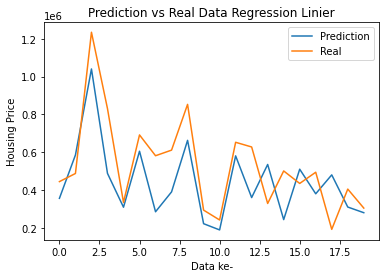

In [12]:
plt.plot(y_test.values)
plt.plot(ypredtest_reglin)
plt.title("Prediction vs Real Data Regression Linier")
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=["Prediction", "Real"])
plt.show()

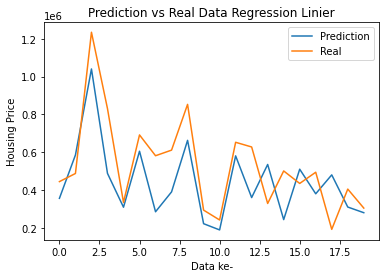

In [13]:
plt.plot(y_test.values)
plt.plot(ypredtest_lasso)
plt.title("Prediction vs Real Data Regression Linier")
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=["Prediction", "Real"])
plt.show()

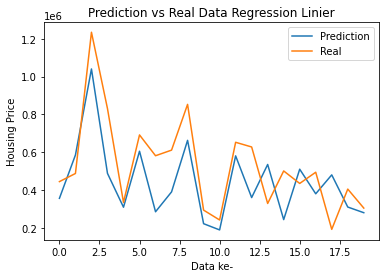

In [14]:
plt.plot(y_test.values)
plt.plot(ypredtest_ridge)
plt.title("Prediction vs Real Data Regression Linier")
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=["Prediction", "Real"])
plt.show()

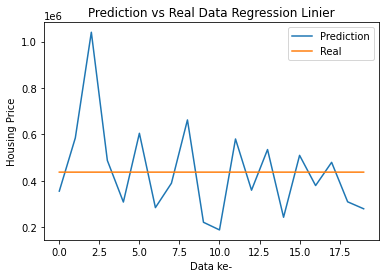

In [15]:
plt.plot(y_test.values)
plt.plot(ypredtest_svr)
plt.title("Prediction vs Real Data Regression Linier")
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=["Prediction", "Real"])
plt.show()

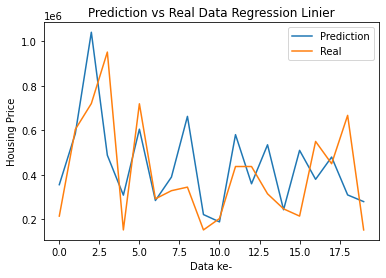

In [16]:
plt.plot(y_test.values)
plt.plot(ypredtest_dtr)
plt.title("Prediction vs Real Data Regression Linier")
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=["Prediction", "Real"])
plt.show()

## Kesimpulan

In [18]:
sqft_living = float(input("Input SQFT Living \t= "))
sqft_living15 = float(input("Input SQFT Living 15 \t= "))
sqft_above = float(input("Input SQFT Above \t= "))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

print("\nHasil Housing Price", hasil_prediksi)

Input SQFT Living 	= 90.0
Input SQFT Living 15 	= 50.4
Input SQFT Above 	= 33.4

Hasil Housing Price 450000.0
